In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset (replace 'your_dataset.csv' with the actual dataset file)
data = pd.read_csv('processed_data_PCA.csv')

# Assuming the last column is the target variable (y), and the rest are features (X)
X = data.drop('y', axis=1)  # Assuming 'y' is your target column
y = data['y']

# # Split into training and testing datasets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Example: Check the shape of the datasets
# print(f"X_train shape: {X_train.shape}")
# print(f"X_test shape: {X_test.shape}")

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Build the model
model = Sequential()

# Input layer
model.add(Dense(128, activation='relu', input_dim=X_train_res.shape[1]))  # X_train_res shape after SMOTE
model.add(Dropout(0.3))  # Dropout for regularization

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train_res, y_train_res, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels

# Print evaluation metrics
print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

c:\Users\wasif\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │         6,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,281 (67.50 KB)

 Trainable params: 17,281 (67.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 2s 945us/step - accuracy: 0.6191 - loss: 0.6660 - val_accuracy: 0.7978 - val_loss: 0.5463
Epoch 2/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - accuracy: 0.7262 - loss: 0.5529 - val_accuracy: 0.7667 - val_loss: 0.5468
Epoch 3/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 1s 836us/step - accuracy: 0.7474 - loss: 0.5251 - val_accuracy: 0.8330 - val_loss: 0.4690
Epoch 4/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 1s 797us/step - accuracy: 0.7637 - loss: 0.5003 - val_accuracy: 0.8095 - val_loss: 0.4995
Epoch 5/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step - accuracy: 0.7749 - loss: 0.4793 - val_accuracy: 0.8443 - val_loss: 0.4459
Epoch 6/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 1s 803us/step - accuracy: 0.7851 - loss: 0.4629 - val_accuracy: 0.8170 - val_loss: 0.4530
Epoch 7/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - accuracy: 0.7950 - loss: 0.4433 - val_accuracy: 0.8109 - val_loss: 0.4759
Epoch 8/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - accuracy: 0.7992 -

Training accuracy: 0.8754252195358276
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.8413 - loss: 0.4449
Test accuracy: 0.8384206891059875
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91      7951
         1.0       0.36      0.46      0.41      1091

    accuracy                           0.84      9042
   macro avg       0.64      0.67      0.66      9042
weighted avg       0.86      0.84      0.85      9042

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step


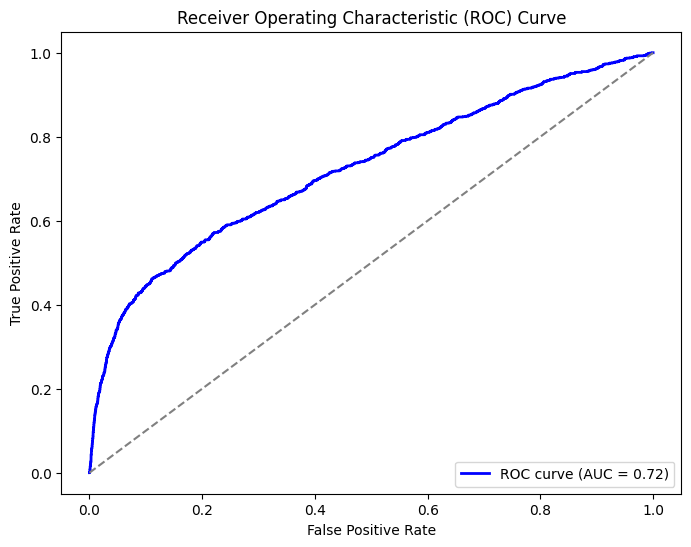

AUC: 0.72


In [8]:
# Get training accuracy from the history object
print("Training accuracy:", history.history['accuracy'][-1])  # Accuracy of the last epoch

# Evaluate the model on test data (X_test and y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

from sklearn.metrics import classification_report

# Predict the labels for the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary labels

# Print classification report
print(classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test set
y_prob = model.predict(X_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print(f"AUC: {roc_auc:.2f}")



In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming your features are stored in `X` and the target variable in `y`
# Perform the train-test split before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define the HyperModel class
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()

        # First hidden layer with hyperparameters for number of units and dropout rate
        model.add(Dense(units=hp.Int('units_1', min_value=64, max_value=256, step=32), 
                        activation='relu', input_dim=X_train_res.shape[1]))
        model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))

        # Second hidden layer with hyperparameters for number of units and dropout rate
        model.add(Dense(units=hp.Int('units_2', min_value=64, max_value=256, step=32), 
                        activation='relu'))
        model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

        # Output layer
        model.add(Dense(1, activation='sigmoid'))

        # Hyperparameter for learning rate
        model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        
        return model

# Initialize the Keras Tuner RandomSearch
tuner = RandomSearch(
    MyHyperModel(),
    objective='val_accuracy',  # Optimize for validation accuracy
    max_trials=10,              # Number of different models to try
    executions_per_trial=3,     # Number of times to train each model
    # directory='Smote_tuner_results',  # Directory to store the results
    # project_name='Smote_model_tuning'
)

# Perform the hyperparameter search with the resampled training data
tuner.search(X_train_res, y_train_res, 
             epochs=50, 
             batch_size=32, 
             validation_data=(X_val , y_val))

# Get the best trial
best_trial = tuner.oracle.get_best_trials(1)[0]

# Load the best model directly from the trial
best_model = tuner.hypermodel.build(best_trial.hyperparameters)

# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test accuracy of the best model: {test_accuracy}")

# You can also print the best hyperparameters found
best_hyperparameters = best_trial.hyperparameters
print(f"Best hyperparameters: {best_hyperparameters.values}")


Trial 10 Complete [00h 03m 06s]
val_accuracy: 0.7848124702771505

Best val_accuracy So Far: 0.8699659109115601
Total elapsed time: 00h 32m 44s


c:\Users\wasif\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.8756 - loss: 0.4464
Test accuracy of the best model: 0.8748064637184143
Best hyperparameters: {'units_1': 160, 'dropout_1': 0.4, 'units_2': 128, 'dropout_2': 0.30000000000000004, 'learning_rate': 0.0003650002642879827}


Epoch 1/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 872us/step - accuracy: 0.8759 - loss: 0.3980 - val_accuracy: 0.8851 - val_loss: 0.3305
Epoch 2/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 862us/step - accuracy: 0.8853 - loss: 0.3279 - val_accuracy: 0.8877 - val_loss: 0.3065
Epoch 3/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 837us/step - accuracy: 0.8883 - loss: 0.3143 - val_accuracy: 0.8902 - val_loss: 0.3032
Epoch 4/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step - accuracy: 0.8915 - loss: 0.3063 - val_accuracy: 0.8891 - val_loss: 0.2967
Epoch 5/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - accuracy: 0.8910 - loss: 0.3031 - val_accuracy: 0.8914 - val_loss: 0.2945
Epoch 6/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step - accuracy: 0.8888 - loss: 0.3034 - val_accuracy: 0.8915 - val_loss: 0.2923
Epoch 7/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - accuracy: 0.8933 - loss: 0.2966 - val_accuracy: 0.8901 - val_loss: 0.2954
Epoch 8/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 911us/step - accuracy: 0.8931 - loss: 0.2959 - 

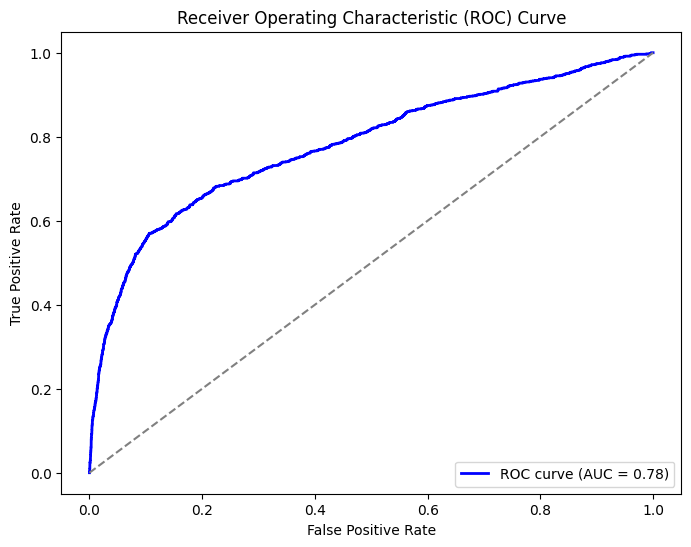

AUC: 0.78
Best hyperparameters: {'units_1': 160, 'dropout_1': 0.4, 'units_2': 128, 'dropout_2': 0.30000000000000004, 'learning_rate': 0.0003650002642879827}


In [13]:
# Get the history of the best model's training
history = best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Get training accuracy from the history object
print("Training accuracy:", history.history['accuracy'][-1])  # Accuracy of the last epoch

# Evaluate the model on the test data (X_test and y_test)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Predict the labels for the test set
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary labels

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Predict probabilities for the test set (for ROC curve)
y_prob = best_model.predict(X_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print(f"AUC: {roc_auc:.2f}")

# You can also print the best hyperparameters found
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
print(f"Best hyperparameters: {best_hyperparameters.values}")